# Connect to Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
%cd /content/gdrive/MyDrive/Data Scientist/Towards data science/Simple Computer Vision Image Creative Analysis using Google Vision API/

/content/gdrive/MyDrive/Data Scientist/Towards data science/Simple Computer Vision Image Creative Analysis using Google Vision API


# Import libraries

In [ ]:
pip install google-cloud-vision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 386 kB 8.2 MB/s 
     |████████████████████████████████| 1.0 MB 43.9 MB/s 
     |████████████████████████████████| 47 kB 3.9 MB/s 
     |████████████████████████████████| 114 kB 49.9 MB/s 
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.17.3
    Uninstalling protobuf-3.17.3:
      Successfully uninstalled protobuf-3.17.3
  Attempting uninstall: google-api-core
    Found existing installation: google-api-core 1.31.6
    Uninstalling google-api-core-1.31.6:
      Successfully uninstalled google-api-core-1.31.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.2+zzzcolab20220719082949 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.1 which is incompatible.
google-cloud-transl

In [ ]:
!pip install webcolors

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from IPython.display import Image
from google.cloud import vision_v1 as vision
import io
import pandas as pd
import os

In [ ]:
from scipy.spatial import KDTree
from webcolors import hex_to_rgb
from webcolors import CSS3_HEX_TO_NAMES

# Activate Google vision API using service account key

In [ ]:
# Activate Google vision API using service account key
client = vision.ImageAnnotatorClient.from_service_account_json("vision-api.json")
image = vision.types.Image()

# Label Detection

File: pic/label.png


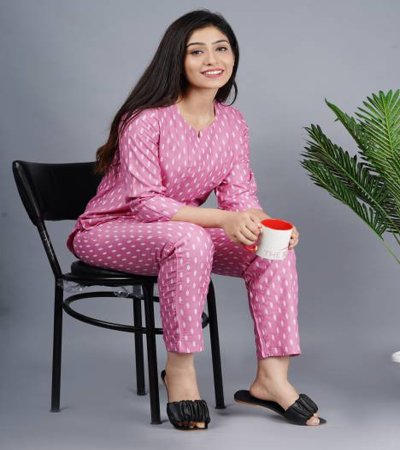

Labels:
Face, Smile, Joint, Skin, Shoe, Arm, Shoulder, Leg, Human body, Sleeve



In [ ]:
# Import the picture
pics = ["pic/label.png"]

for pic in pics:
    print("=" * 79)
    print("File:", pic)
    display(Image(pic, width = 500))
    
    with io.open(pic, "rb") as image_file:
        parse = image_file.read()
    
    query = {"image": {"content": parse},
             "features": [{"type_": "LABEL_DETECTION"}]}
    
    response = client.annotate_image(query)

    # Label detection
    labels = response.label_annotations
    print("Labels:")
    if labels:
        for index, label in enumerate(labels):
            if index != len(labels) - 1:
                print(label.description, end = ", ")
            else:
                print(label.description, end = "\n\n")
    else:
        print("[None]", end = "\n\n")

# Object Detection

File: pic/object.png


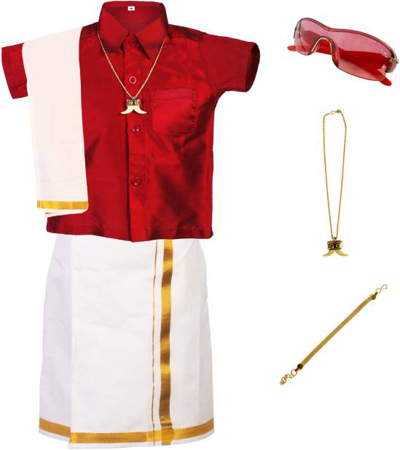

Number of objects found: 7
Sunglasses (Confidence: 0.9075868129730225)
  Normalized bounding polygon vertices: 
  • (0.7152940630912781, 0.03025873191654682)
  • (0.9912452101707458, 0.03025873191654682)
  • (0.9912452101707458, 0.18952979147434235)
  • (0.7152940630912781, 0.18952979147434235)
Necklace (Confidence: 0.827012300491333)
  Normalized bounding polygon vertices: 
  • (0.7888254523277283, 0.23976582288742065)
  • (0.8789485096931458, 0.23976582288742065)
  • (0.8789485096931458, 0.5786653757095337)
  • (0.7888254523277283, 0.5786653757095337)
Necklace (Confidence: 0.765210747718811)
  Normalized bounding polygon vertices: 
  • (0.6977918744087219, 0.6217525601387024)
  • (0.9729085564613342, 0.6217525601387024)
  • (0.9729085564613342, 0.8596880435943604)
  • (0.6977918744087219, 0.8596880435943604)
Miniskirt (Confidence: 0.7599698305130005)
  Normalized bounding polygon vertices: 
  • (0.08722742646932602, 0.5060120224952698)
  • (0.5405347347259521, 0.5060120224952698)
  •

In [ ]:
# Import the picture
pics = ["pic/object.png"]

for pic in pics:
    print("=" * 79)
    print("File:", pic)
    display(Image(pic, width = 500))
    
    with io.open(pic, "rb") as image_file:
        parse = image_file.read()
    
    query = {"image": {"content": parse},
             "features": [{"type_": "OBJECT_LOCALIZATION"}]}
    
    response = client.annotate_image(query)

    # Object Localization detection
    objects = response.localized_object_annotations
    if objects:
        print("Number of objects found: {}".format(len(objects)))
        for obj in objects:
            print("{} (Confidence: {})".format(obj.name, obj.score))
            print("  Normalized bounding polygon vertices: ")
            for vertex in obj.bounding_poly.normalized_vertices:
                print("  • ({}, {})".format(vertex.x, vertex.y))
    else:
        print("[None]")

# Face expression detection

File: pic/face_expression.png


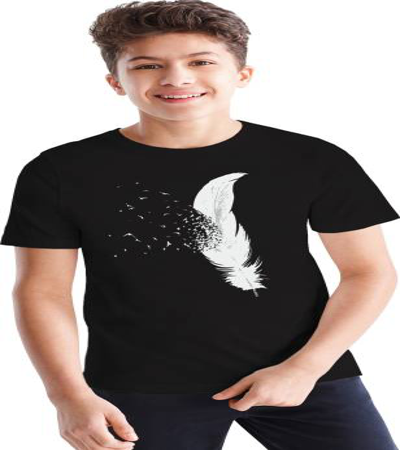

Face 1
Joy: VERY_LIKELY
Sorrow: VERY_UNLIKELY
Anger: VERY_UNLIKELY
Surprise: VERY_UNLIKELY
Face Bounds: (115,0), (240,0), (240,141), (115,141)



In [ ]:
# Import the picture
pics = ["pic/face_expression.png"]

for pic in pics:
    print("=" * 79)
    print("File:", pic)
    display(Image(pic, width = 500))
    
    with io.open(pic, "rb") as image_file:
        parse = image_file.read()
    
    query = {"image": {"content": parse},
             "features": [{"type_": "FACE_DETECTION"}]}
    
    response = client.annotate_image(query)

    # Face expression detection
    faces = response.face_annotations
    likelihood_name = ("UNKNOWN", "VERY_UNLIKELY", "UNLIKELY", "POSSIBLE", "LIKELY", "VERY_LIKELY")
    if faces:
        for index, face in enumerate(faces):
            print("Face", index + 1)
            print("Joy: {}".format(likelihood_name[face.joy_likelihood]))
            print("Sorrow: {}".format(likelihood_name[face.sorrow_likelihood]))
            print("Anger: {}".format(likelihood_name[face.anger_likelihood]))
            print("Surprise: {}".format(likelihood_name[face.surprise_likelihood]))
            vertices = (["({},{})".format(vertex.x, vertex.y)
                        for vertex in face.bounding_poly.vertices])
            print("Face Bounds: {}".format(", ".join(vertices)), end = "\n\n")

# Text detection

File: pic/text.png


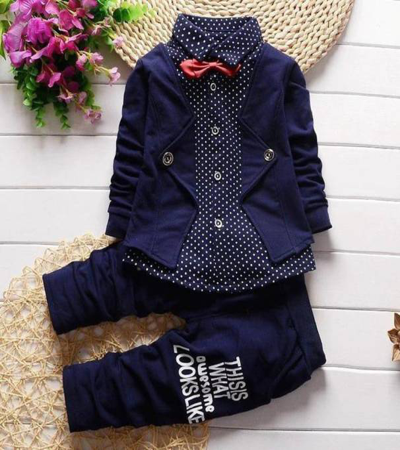

Texts:
"文化
THISIS
WHAT
awesome
LOOKS LIKE"
  • Text Bounds: (52,101), (249,101), (249,423), (52,423)
"文化"
  • Text Bounds: (67,101), (73,127), (59,130), (53,104)
"THISIS"
  • Text Bounds: (240,356), (248,399), (231,402), (223,359)
"WHAT"
  • Text Bounds: (223,360), (229,397), (214,400), (207,363)
"awesome"
  • Text Bounds: (204,354), (214,410), (205,412), (195,356)
"LOOKS"
  • Text Bounds: (189,342), (199,392), (182,395), (172,345)
"LIKE"
  • Text Bounds: (199,392), (204,419), (188,423), (182,395)




In [ ]:
# Import the picture
pics = ["pic/text.png"]

for pic in pics:
    print("=" * 79)
    print("File:", pic)
    display(Image(pic, width = 500))
    
    with io.open(pic, "rb") as image_file:
        parse = image_file.read()
    
    query = {"image": {"content": parse},
             "features": [{"type_": "TEXT_DETECTION"}]}
    
    response = client.annotate_image(query)

    # Text detection
    texts = response.text_annotations
    print("Texts:")
    if texts:
        for text in texts:
            print("\"{}\"".format(text.description))
            vertices = (["({},{})".format(vertex.x, vertex.y)
                        for vertex in text.bounding_poly.vertices])
            print("  • Text Bounds: {}".format(", ".join(vertices)))
        print("\n")
    else:
        print("[None]", end = "\n\n")

# Color detection

File: pic/color.png


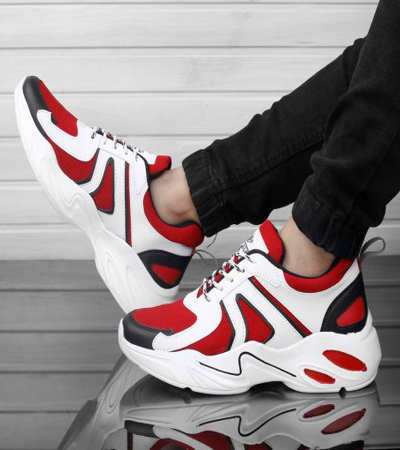

Color 0 Fraction: 0.16305483877658844
Hex Color:  141313
Color 1 Fraction: 0.010103825479745865
Hex Color:  A41B24
Color 2 Fraction: 0.010382551699876785
Hex Color:  68191E
Color 3 Fraction: 0.0016026757657527924
Hex Color:  CD2533
Color 4 Fraction: 0.25266531109809875
Hex Color:  EDE9E8
Color 5 Fraction: 0.004111211746931076
Hex Color:  B79082
Color 6 Fraction: 0.009755417704582214
Hex Color:  9D2735
Color 7 Fraction: 0.00689847394824028
Hex Color:  883339
Color 8 Fraction: 0.0002090446650981903
Hex Color:  153019
Color 9 Fraction: 0.0018814019858837128
Hex Color:  BE182A



In [ ]:
# Import the picture
pics = ["pic/color.png"]

# Convert the float number to hex color number
def float2hex(val):
    hexval = hex(int(val))[2:].upper()
    hexval = "0" + hexval if len(hexval) < 2 else hexval
    return hexval

for pic in pics:
    print("=" * 79)
    print("File:", pic)
    display(Image(pic, width = 500))
    
    with io.open(pic, "rb") as image_file:
        parse = image_file.read()
    
    query = {"image": {"content": parse},
             "features": [{"type_": "IMAGE_PROPERTIES"}]}
    
    response = client.annotate_image(query)

    # Color detection        
    props = response.image_properties_annotation
    if props.dominant_colors.colors:
        for index, color in enumerate(props.dominant_colors.colors):
            print("Color", index, "Fraction: {}".format(color.pixel_fraction))
            print("Hex Color: ",float2hex(color.color.red) + float2hex(color.color.green)+float2hex(color.color.blue))
        print("")
    else:
        print("[None]", end = "\n\n")

In [ ]:
!pip install webcolors

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
def convert_rgb_to_names(rgb_tuple):
    # a dictionary of all the hex and their respective names in css3
    css3_db = CSS3_HEX_TO_NAMES
    names = []
    rgb_values = []
    for color_hex, color_name in css3_db.items():
        names.append(color_name)
        rgb_values.append(hex_to_rgb(color_hex))
    
    kdt_db = KDTree(rgb_values)
    distance, index = kdt_db.query(rgb_tuple)
    return f'{names[index]}'

# Detect the hex color to the real color name
h = 'A41B24'
print(h)
print('RGB =', tuple(int(h[i:i+2], 16) for i in (0, 2, 4)))
j = tuple(int(h[i:i+2], 16) for i in (0, 2, 4))
print(convert_rgb_to_names(j))

A41B24
RGB = (164, 27, 36)
firebrick
